# Задание 1

Реализуйте базовый частотный метод по Шерлоку Холмсу:
подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
расшифруйте их таким частотным методом.


### Комментарий к решению

#### Шаг 1
Возьмем в качестве обучающего текста "Войну и мир" на английском языке. Создадим словарь частот униграмм. Отсортируем по убыванию частоты

In [702]:
import re
from collections import Counter, defaultdict
from random import shuffle, sample, uniform
from math import log, exp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
text_file = "WarAndPeaceEng.txt"

In [568]:
def calculate_frequencies(text_path, sub_tab=True):
    frequencies = Counter()
    with open(text_path, encoding='utf-8') as fp:
        for line in fp:
            if sub_tab:
                line = re.sub(r"\W+", " ", line).lower()
            frequencies.update(Counter(line))
    return frequencies

In [126]:
def sort_frequencies(frequencies):
    return [k for k, _ in sorted(frequencies.items(), key=lambda item: item[1], reverse=True)]

In [111]:
def look_at_dict(d, n=10):
    head = list(d.keys())[:n]
    for key in head:
        print({key: d[key]})

In [646]:
unigram_frequencies = calculate_frequencies(text_file)

In [647]:
look_at_dict(unigram_frequencies)

{' ': 596017}
{'t': 226406}
{'h': 167404}
{'e': 315233}
{'p': 45533}
{'r': 148428}
{'o': 192879}
{'j': 2574}
{'c': 61623}
{'g': 51326}


In [648]:
most_frequent = sort_frequencies(unigram_frequencies)
most_frequent[:10]

[' ', 'e', 't', 'a', 'o', 'n', 'i', 'h', 's', 'r']

#### Шаг 2
Создадим шифр из случайной перестановки униграмм. Для тестового примера возьмем 3 текста размером от 50 до 1000 символов.

In [650]:
random.seed(45)

def create_cipher(frequencies):
    encrypt = dict()
    decrypt = dict()
    keys = list(frequencies.keys())
    ciphered_keys = keys.copy()
    shuffle(ciphered_keys)
    for key, ciphered_key in zip(keys, ciphered_keys):
        encrypt[key] = ciphered_key
        decrypt[ciphered_key] = key
        assert key != ciphered_key
    return encrypt, decrypt

In [838]:
encrypt_dict, decrypt_dict = create_cipher(unigram_frequencies)

In [652]:
look_at_dict(encrypt_dict)

{' ': 'ä'}
{'t': 'é'}
{'h': 'f'}
{'e': 'w'}
{'p': 'j'}
{'r': 'b'}
{'o': 'y'}
{'j': 'ê'}
{'c': 'n'}
{'g': 'u'}


In [151]:
small_sample_text = "SmallSampleText.txt"
medium_sample_text = "MediumSampleText.txt"
big_sample_text = "BigSampleText.txt"

#### Шаг 3
Попробуем зашифровать и расшифровать тестовые примеры. Для расшифровки будем заменять наиболее часо встречающиеся униграммы в тестовом примере на наиболее частотые из словаря, созданного по "Войне и миру"

In [99]:
def encrypt_text(text, cipher):
    return ''.join([cipher[l] for l in text])

In [846]:
def preprocess_text(file, cipher, sub_tab=True):
    with open(file, encoding='utf-8') as fp:
        original_text = ''
        ciphered_text = ''
        for line in fp:
            if sub_tab:
                line = re.sub(r"\W+", " ", line).lower()
            original_text += line
            line = encrypt_text(line, cipher)
            ciphered_text += line
    return original_text, ciphered_text

In [142]:
def create_decryption_dict(text_most_frequent, train_text_most_frequent):
    decryption_dict = {}
    for i in range(len(text_most_frequent)):
        decryption_dict[text_most_frequent[i]] = train_text_most_frequent[i]
    return decryption_dict

In [168]:
def calculate_quality(origin_dictionary, decrypted_dictionary):
    return sum([1 if origin_dictionary[s] == decrypted_dictionary[s] else 0 for s in decrypted_dictionary]) / len(decrypted_dictionary)

In [296]:
def decrypt_text(
    text_file, encrypt_dict=encrypt_dict, decrypt_dict=decrypt_dict, 
    train_text_most_frequent=most_frequent, n_first_symbols_to_print = 256,
):
    encrypted_text = preprocess_text(text_file, encrypt_dict)
    print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')
    
    original_text = encrypt_text(encrypted_text, decrypt_dict)
    print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')
    
    encrypted_text_frequencies = Counter(encrypted_text)
    most_frequent = sort_frequencies(encrypted_text_frequencies)
    print(f'size_of_dictionary_encrypted_text: {len(most_frequent)}')
    print(f'size_of_dictionary_training_text: {len(encrypt_dict)}\n')
    
    frequencies_dict = create_decryption_dict(most_frequent, train_text_most_frequent)    
    decrypted_message = ''.join([frequencies_dict[s] for s in encrypted_text])
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
    print(f'accuracy of decrypted dictionary is: {calculate_quality(decrypt_dict, frequencies_dict):.2f}')

#### Шаг 4
Посмотрим на результаты. В качестве метрики возьмем процент правильно угаданных букв в тестовом примере. Метрика спорная, т.к. одни и те же буквы в ней будут посчитаны много раз, в зависимости от частоты. С другой стороны, она поощряет угадывать самые важные буквы, т.е. те, которые встречаются чаще других (в отличие, например, от процента правильно угаданных букв в словаре)

In [297]:
decrypt_text(small_sample_text)

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

original_text: no one is right and no one is to blame so she too is not to blame

size_of_dictionary_encrypted_text: 15
size_of_dictionary_training_text: 41

decrypted_message: te eta io uimsn htc te eta io ne rdhla oe osa nee io ten ne rdhla

accuracy of decrypted dictionary is: 0.13


In [298]:
decrypt_text(medium_sample_text)

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

size_of_dictionary_encrypted_text: 26
size_of_dictionary_training_text: 41

decrypted_message: ekedgnhiom etteonial has aldeasg ceeo sroe ween haost oevyt aos eadt uathes pedwfbes aos prusedes at cewint a call nhe rpeourdy tily tnrvyiomt aos uhine tanio thret uinh diccrot uede aldeasg ro nhe haidsdettiom uat albrtn sroe troga uat wioithiom sdettiom 

accuracy of decrypted dictionary is: 0.27


In [299]:
decrypt_text(big_sample_text)

encrypted_text: àwékww1äéfbwwäo1zämy4bäyänxyn9äq1äéfwäoméwb1yy1äjbq1nwäo1zbwkäkfyäfozäjwbhqhéwzäq1äfqhäbwl4whéäéyä94é4iysäobbqswzäoéäub41éfäo1zäbwjybéwzäfq7hwxmäéyäàouboéqy1äày1ojobéwähäozê4éo1éäfozä1yéäcwéäbwonfwzä74boéähäzwéonf7w1éäo1zäéfwäàoééxwäfozä1yéäcwéäàwu41äq1äào

original_text: between three and four o clock in the afternoon prince andrew who had persisted in his request to kutuzov arrived at grunth and reported himself to bagration bonaparte s adjutant had not yet reached murat s detachment and the battle had not yet begun in ba

size_of_dictionary_encrypted_text: 27
size_of_dictionary_training_text: 41

decrypted_message: betgeea tshee oad unch n mlnmv ia tse outehanna yhiame oadheg gsn sod yehrirted ia sir hezcert tn vctcqnk ohhiked ot whcats oad heynhted sifrelu tn bowhotina bnaoyohte r odxctoat sod ant pet heomsed fchot r detomsfeat oad tse bottle sod ant pet bewca ia bo

accuracy of decrypted dictionary is: 0.26


#### Выводы
Тут и без метрик понятно, что ничего не понятно. Пока даже близко не получилось расшифровать что-то похожее на исходный текст

# Задание 2

Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
проведите тестирование аналогично п.1, но при помощи биграмм.


### Комментарий к решению

#### Шаг 1
По аналогии с п. 1 создадим словарь частот биграмм. Отсортируем по убыванию частоты

In [619]:
def calculate_ngram_frequencies(text_path, n_grams=2):
    frequencies = defaultdict(int)
    with open(text_path, encoding='utf-8') as fp:
        for line in fp:
            line = re.sub(r"\W+", " ", line).lower()
            for i in range(len(line) - n_grams + 1):
                frequencies[line[i: i + n_grams]] += 1
    return frequencies

In [181]:
bigram_frequencies = calculate_ngram_frequencies(text_file)

In [182]:
look_at_dict(bigram_frequencies)

{' t': 82891}
{'th': 73755}
{'he': 75247}
{'e ': 112667}
{' p': 16561}
{'pr': 7855}
{'ro': 14770}
{'oj': 121}
{'je': 564}
{'ec': 5434}


In [184]:
len(bigram_frequencies)

674

In [183]:
most_frequent_bigrams = sort_frequencies(bigram_frequencies)
most_frequent_bigrams[:10]

['e ', ' t', 'd ', 'he', 'th', ' a', 's ', 't ', 'in', ' h']

#### Шаг 2
Расшифровку будем проводить аналогично п. 1. Разница здесь в том, что некорректно заменять все подряд биграммы в зашифрованном тексте на биграммы из словаря, т.к. одни и те же зашифрованные униграммы будут расшифровываться по разному. Но для того, чтобы примерно прикинуть качество такого подхода, можно на этот момент закрыть глаза. Здесь также подойдет метрика, выбранная в п. 1, т.к. она как раз учитывает, что в разных местах мы можем по-разному расшифровать одну и ту же униграмму.

In [261]:
def encrypt_text_bigrams(text, cipher):
    encrypted_symbols = []
    
    for i in range(0, len(text) - 1, 2):
        if i == len(text) - 1:
            break
        encrypted_symbols.append(cipher[text[i: i + 2]])
    return ''.join(encrypted_symbols)

In [620]:
def calculate_ngrams_in_text(text, n_grams=2):
    frequencies = defaultdict(int)
    for i in range(len(text) - n_grams + 1):
        frequencies[text[i: i + n_grams]] += 1
    return frequencies

In [509]:
def calculate_quality_ngrams(original_text, decrypted_text):
    num_correct_symbols = sum([1 if original_text[i] == decrypted_text[i] else 0 for i in range(len(decrypted_text))])
    return num_correct_symbols / len(decrypted_text)

In [510]:
def decrypt_text_bigrams(
    text_file, encrypt_dict=encrypt_dict, decrypt_dict=decrypt_dict, 
    train_text_most_frequent=most_frequent_bigrams,
    n_first_symbols_to_print = 256,
):
    encrypted_text = preprocess_text(text_file, encrypt_dict)
    print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')
    
    original_text = encrypt_text(encrypted_text, decrypt_dict)
    print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')
    
    encrypted_text_frequencies = calculate_ngrams_in_text(encrypted_text)
    most_frequent = sort_frequencies(encrypted_text_frequencies)
    print(f'size_of_dictionary_encrypted_text: {len(most_frequent)}')
    print(f'size_of_dictionary_training_text: {len(train_text_most_frequent)}\n')
    
    frequencies_dict = create_decryption_dict(most_frequent, train_text_most_frequent)
    decrypted_message = encrypt_text_bigrams(encrypted_text, frequencies_dict)
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
    print(f'accuracy of decrypted dictionary is: {calculate_quality_ngrams(original_text, decrypted_message):.2f}')

In [511]:
decrypt_text_bigrams(small_sample_text)

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

original_text: no one is right and no one is to blame so she too is not to blame

size_of_dictionary_encrypted_text: 33
size_of_dictionary_training_text: 674

decrypted_message: d inanhe a iatero hid inanhe at  srer  oe to tt e thn g s e  wnd

accuracy of decrypted dictionary is: 0.12


In [514]:
decrypt_text_bigrams(medium_sample_text)

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

size_of_dictionary_encrypted_text: 186
size_of_dictionary_training_text: 674

decrypted_message: sa wlo m hco i ff ngndtod noouh onm r wamelem  sha o tmene to heoubeinans headdiweisd  oteomron heanonuthi tatem pers itadldsh eascat elnee  yd  oin mlyt ale t tiy inhi nimlied tman d noouh itr th ahayo dy as hinand i ge swamet ed ginanlee fr m h bn  ie re

accuracy of decrypted dictionary is: 0.07


In [515]:
decrypt_text_bigrams(big_sample_text)

encrypted_text: àwékww1äéfbwwäo1zämy4bäyänxyn9äq1äéfwäoméwb1yy1äjbq1nwäo1zbwkäkfyäfozäjwbhqhéwzäq1äfqhäbwl4whéäéyä94é4iysäobbqswzäoéäub41éfäo1zäbwjybéwzäfq7hwxmäéyäàouboéqy1äày1ojobéwähäozê4éo1éäfozä1yéäcwéäbwonfwzä74boéähäzwéonf7w1éäo1zäéfwäàoééxwäfozä1yéäcwéäàwu41äq1äào

original_text: between three and four o clock in the afternoon prince andrew who had persisted in his request to kutuzov arrived at grunth and reported himself to bagration bonaparte s adjutant had not yet reached murat s detachment and the battle had not yet begun in ba

size_of_dictionary_encrypted_text: 366
size_of_dictionary_training_text: 674

decrypted_message: nopsrs sd n e erthbuun wesaipito sd e rr meiet ssos it andn loil iorthyollde mths redearxirgve t ioe vxthtof didthaselewis nerthn nievharecarimu t ifedoasla sigpowoeve t lycrm isrelyieicprraartil ha runasanneramoaky  herthd e feabalrelyieicprrao mpurto sfe

accuracy of decrypted dictionary is: 0.19


#### Шаг 3
Для примера посмотрим еще на отрывок из "Анны Карениной"

In [247]:
huge_sample_text = "AnnaKareninaEng.txt"

In [516]:
decrypt_text_bigrams(huge_sample_text)

encrypted_text: xwyäéyxhéycäääo11oä9obw1q1oäääébo1hxoéwzäàcäny1héo1nwäuob1wééääääjobéäy1wäääsw1uwo1nwäqhä7q1wäqäkqxxäbwjocääääääqääfojjcämo7qxqwhäobwäoxxäoxq9wäwswbcä41fojjcämo7qxcäqhä41fojjcäq1äqéhäyk1äkocääwswbcéfq1uäkohäq1äny1m4hqy1äq1äéfwäyàxy1h9chäfy4hwäéfwäkqmwäfozä

original_text: leo tolstoy   anna karenina   translated by constance garnett    part one   vengeance is mine i will repay      i  happy families are all alike every unhappy family is unhappy in its own way  everything was in confusion in the oblonskys house the wife had 

size_of_dictionary_encrypted_text: 586
size_of_dictionary_training_text: 674

decrypted_message: esatg ccg nditerttk neis hh itrrerrco outondbeoouryoe efegies itvenes ene it dhaceyoe  ff  he soimeautokfritititsot odohteaveefiinnee a hoa uee un wndmoedakndiveclyreinmoedaknd hreugy pt sfritun wduonha sasren beehw fon  h td y eyen klut hint td  stse edhe

accuracy of decrypted dictionary is: 0.20


#### Выводы
На больших текстах кол-во биграмм в тестовом отрывке становится сопоставимо с общих количеством биграмм в словаре. Но качество по-прежнему далеко от приемлемого уровня. И даже ниже, чем на униграммах.

# Задание 3

Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
реализуйте и протестируйте его, убедитесь, что результаты улучшились.

### Комментарий к решению

#### Шаг 1
Используем алгоритм Метрополиса-Гастингса. 
1) Берем базовый шифр, который получается из случайной перестановки символов в словаре. Расшифровывем текст (по униграммам, с помощью полученного шифра).  
2) Составляем словарь частот биграмм (в последствии n-грамм) в расшифрованном тексте.  
3) Берем словарь частот биграмм (в последствии n-грамм) в обучающем тексте ("Война и мир").  
4) Считаем "скор" нашего шифра по формуле:  
$score = \Sigma v * log(u)$, где  
v - частота биграммы в расшифрованном тексте  
u - частота биграммы в тренировочном тексте  
Сумма считается по всем биграммам из расшифрованного тектса  
5) Далее делаем n итераций (в базовом сценарии 10000). На каждой итерации случайно переставляем 2 символа в словаре. Счиатем "скор" нового шифра. Если он больше базового, берем этот словарь в качесте базового. Если нет, берем его с вероятностью exp(score_new-score_basic)  
6) Проверяем, что на какой-то итерации система достигает "динамического равновесия" и большинство букв в словаре не меняются и похожи на правду.

In [503]:
def generate_cipher(frequencies):
    encrypt = dict()
    keys = list(frequencies.keys())
    ciphered_keys = keys.copy()
    shuffle(ciphered_keys)
    for key, ciphered_key in zip(keys, ciphered_keys):
        encrypt[key] = ciphered_key
    return encrypt

def random_permute_cipher(frequencies):
    cipher = frequencies.copy()
    key_1, key_2 = sample(cipher.keys(), 2)
    cipher[key_1], cipher[key_2] = cipher[key_2], cipher[key_1]
    return cipher

In [504]:
def get_cipher_score(bigram_frequencies, decrypted_text_frequencies):
    cipher_score = 0
    for k, v in decrypted_text_frequencies.items():
        if k in bigram_frequencies:
            cipher_score += v * log(bigram_frequencies[k])
    return cipher_score

In [505]:
def metropolis_hastings_log_accept(l, l_new):
    if l_new > l:
        return True
    else:
        return uniform(0, 1) < exp(l_new-l)

In [672]:
def metropolis_hastings_decrypt(
    n_iter, encrypted_text, unigram_frequencies, bigram_frequencies, n_first_symbols_to_print, n_grams=2, verbose=True,
):
    current_cipher = generate_cipher(unigram_frequencies)
    decrypted_text = ''.join([current_cipher[s] for s in encrypted_text])
    decrypted_text_frequencies = calculate_ngrams_in_text(decrypted_text, n_grams)
    current_score = get_cipher_score(bigram_frequencies, decrypted_text_frequencies)
    
    for i in range(n_iter):
        proposed_cipher = random_permute_cipher(current_cipher)
        proposed_decrypted_text = ''.join([proposed_cipher[s] for s in encrypted_text])
        proposed_decrypted_text_frequencies = calculate_ngrams_in_text(proposed_decrypted_text, n_grams)
        proposed_current_score = get_cipher_score(bigram_frequencies, proposed_decrypted_text_frequencies)
        
        if metropolis_hastings_log_accept(current_score, proposed_current_score):
            current_cipher = proposed_cipher
            current_score = proposed_current_score
        
        if verbose and i % 500 == 0:
            print(f"iteration {i}: {''.join([current_cipher[s] for s in encrypted_text])[:n_first_symbols_to_print]}")
    
    return current_cipher

In [845]:
def decrypt_text_n_grams_mcmc(
    text_file, 
    encrypt_dict=encrypt_dict,
    train_ngram_frequencies=bigram_frequencies,
    alphabet=unigram_frequencies,
    n_first_symbols_to_analyze = None,
    n_first_symbols_to_print = 256,
    n_iter = 10000,
    n_grams = 2,
    verbose = True,
):
    original_text, encrypted_text = preprocess_text(text_file, encrypt_dict)
    if n_first_symbols_to_analyze:
        original_text = original_text[:n_first_symbols_to_analyze] 
        encrypted_text = encrypted_text[:n_first_symbols_to_analyze]
    
    if verbose:
        print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')
        print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')

    encrypted_text_frequencies = calculate_ngrams_in_text(encrypted_text)
    if verbose:
        print(f'size_of_dictionary_encrypted_text: {len(encrypted_text_frequencies)}')
        print(f'size_of_dictionary_training_text: {len(train_ngram_frequencies)}\n')

    frequencies_dict = metropolis_hastings_decrypt(
        n_iter, encrypted_text, alphabet, train_ngram_frequencies, n_first_symbols_to_print, n_grams, verbose,
    )
    
    decrypted_message = ''.join([frequencies_dict[s] for s in encrypted_text])
    accuracy = calculate_quality_ngrams(original_text, decrypted_message)
    if verbose:
        print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
        print(f'accuracy of decrypted dictionary is: {accuracy:.2f}')
    return frequencies_dict, accuracy

#### Шаг 2
Проверяем на текстах разной длины. 

In [562]:
_ = decrypt_text_n_grams_mcmc(small_sample_text)

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

original_text: no one is right and no one is to blame so she too is not to blame

size_of_dictionary_encrypted_text: 41
size_of_dictionary_training_text: 674

iteration 0: kp pk5 qo iqnäf 1ke kp pk5 qo fp jb185 op oä5 fpp qo kpf fp jb185
iteration 500: ne eng al wapir tno ne eng al re hctsg le lig ree al ner re hctsg
iteration 1000: ne eng al tavir onc ne eng al re shodg le lig ree al ner re shodg
iteration 1500: ne eng al hadir onk ne eng al re stoug le lig ree al ner re stoug
iteration 2000: ne eng ad halir onf ne eng ad re stoug de dig ree ad ner re stoug
iteration 2500: ne eng ad walir ony ne eng ad re stoug de dig ree ad ner re stoug
iteration 3000: ne eng ad walir ony ne eng ad re stoug de dig ree ad ner re stoug
iteration 3500: ne eng ad walir ony ne eng ad re stoug de dig ree ad ner re stoug
iteration 4000: ne eng ad walir ony ne eng ad re stoug de dig ree ad ner re stoug
iteration 4500: ne eng a

In [531]:
_ = decrypt_text_n_grams_mcmc(medium_sample_text)

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

size_of_dictionary_encrypted_text: 41
size_of_dictionary_training_text: 674

iteration 0: ànà8v5uk41xàggà45kz0xuzdxz08àzdvxpàà4xdé4àxaàà5xuz4dgx4à9ägxz4dxàz8gxszguàdx3à8aêlàdxz4dx3ésdà8àdxzgxpàak5gxzxpz00x5uàxé3à4sé8äxgk0äxg5é9äk41gxz4dxsuk5àxgz5k4xguéàgxsk5ux8kppé4gxsà8àxz08àzdvxé4x5uàxuzk8d8àggk41xszgxz0lég5xdé4àxgé4vzxszgxak4kguk41xd8àggk41x
iteration 500:  q rztelupi ss utlndiengindr ngzik  uigou ih  tienugsiu xvsinugi nrsimnse gic rhaj ginugico

In [535]:
bigrams_decrypt_dict, _ = decrypt_text_n_grams_mcmc(big_sample_text)

encrypted_text: àwékww1äéfbwwäo1zämy4bäyänxyn9äq1äéfwäoméwb1yy1äjbq1nwäo1zbwkäkfyäfozäjwbhqhéwzäq1äfqhäbwl4whéäéyä94é4iysäobbqswzäoéäub41éfäo1zäbwjybéwzäfq7hwxmäéyäàouboéqy1äày1ojobéwähäozê4éo1éäfozä1yéäcwéäbwonfwzä74boéähäzwéonf7w1éäo1zäéfwäàoééxwäfozä1yéäcwéäàwu41äq1äào

original_text: between three and four o clock in the afternoon prince andrew who had persisted in his request to kutuzov arrived at grunth and reported himself to bagration bonaparte s adjutant had not yet reached murat s detachment and the battle had not yet begun in ba

size_of_dictionary_encrypted_text: 41
size_of_dictionary_training_text: 674

iteration 0: a54o559p4gk55pe9hpzyrkpypàlyàtpä9p4g5pez45k9yy9pjkä9à5pe9hk5opogypgehpj5k8ä845hpä9pgä8pk5sr584p4yptr4réyipekkäi5hpe4pêkr94gpe9hpk5jyk45hpgäc85lzp4ypaeêke4äy9pay9ejek45p8peh6r4e94pgehp9y4p254pk5eàg5hpcrke4p8ph54eàgc594pe9hp4g5pae44l5pgehp9y4p254pa5êr9pä9pae
iteration 500: x iy  teinl  eotwecadleaeusau2egtein eoci ltaateklgtu eotwl yeynaenowek lrgri wegtengrel bd

#### Выводы
Алгоритм работает гораздо лучше предыдущих! И распознает даже относительно короткие тексты очень точно

#### Шаг 3
Попробуем расшифровать короткий текст словарем, обученном на длинном тексте. 

In [538]:
encrypted_sample_text = preprocess_text(small_sample_text, encrypt_dict)

In [539]:
def decrypt_message_with_dict(encrypted_text, decrypt_dict):
    print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')
    decrypted_message = ''.join([decrypt_dict[s] for s in encrypted_text])
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
    print(f'accuracy of decrypted dictionary is: {calculate_quality_ngrams(original_text, decrypted_message):.2f}')

In [540]:
decrypt_message_with_dict(encrypted_sample_text, bigrams_decrypt_dict)

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

decrypted_message: no one is right and no one is to blame so she too is not to blame

accuracy of decrypted dictionary is: 1.00


#### Работает!

# Задание 4

Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

#### Шаг 1
Действуем по аналогии с п. 3. Пробуем сначала английский язык.

In [550]:
secret_message = "SecretMessage.txt"

In [580]:
def generate_random_cipher(symbols, alphabet):
    encrypt = dict()
    ciphered_keys = list(symbols.keys())
    keys = sample(list(alphabet.keys()), len(ciphered_keys))
    for key, ciphered_key in zip(keys, ciphered_keys):
        encrypt[ciphered_key] = key
    return encrypt

In [810]:
def decrypt_ciphered_text_n_grams_mcmc(
    text_file, 
    train_text_file,    
    n_first_symbols_to_print = 256,
    n_iter = 10000,
    n_grams = 2,
):
    alphabet = calculate_frequencies(train_text_file)
    encrypted_alphabet = calculate_frequencies(text_file, sub_tab=False)
    
    train_ngram_frequencies = calculate_ngram_frequencies(russian_text_file, n_grams=n_grams)
    init_random_cipher = generate_random_cipher(encrypted_alphabet, alphabet)
    
    original_text, encrypted_text = preprocess_text(text_file, init_random_cipher, sub_tab=False)
    print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')   
    
    encrypted_text_frequencies = calculate_ngrams_in_text(encrypted_text)
    print(f'size_of_dictionary_encrypted_text: {len(encrypted_text_frequencies)}')
    print(f'size_of_dictionary_training_text: {len(train_ngram_frequencies)}\n')
    
    frequencies_dict = metropolis_hastings_decrypt(
        n_iter, encrypted_text, alphabet, train_ngram_frequencies, n_first_symbols_to_print, n_grams
    )
    
    decrypted_message = ''.join([frequencies_dict[s] for s in encrypted_text])
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')

#### Шаг 2
Для начала переведем все символы в известные униграммы случаным образом (чтобы дальше уже работать в рамках одного набора символов)

In [584]:
encrypted_alphabet = calculate_frequencies(secret_message, sub_tab=False)
look_at_dict(encrypted_alphabet)

{'←': 22}
{'⇠': 10}
{'⇒': 13}
{'↟': 15}
{'↹': 34}
{'↷': 7}
{'⇊': 6}
{'↤': 4}
{'↨': 12}
{'↝': 13}


In [585]:
init_random_cipher = generate_random_cipher(encrypted_alphabet, unigram_frequencies)
look_at_dict(init_random_cipher)

{'←': 'é'}
{'⇠': 'w'}
{'⇒': 'a'}
{'↟': 'p'}
{'↹': 'j'}
{'↷': 't'}
{'⇊': 'n'}
{'↤': 'v'}
{'↨': '0'}
{'↝': 'f'}


In [608]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, text_file, n_iter = 50000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 41
size_of_dictionary_training_text: 674

iteration 0: ét2ouä3uäohogéu691xf2y63êuo2ouà9jgou691xf2y63êugéctgu4ueg979ut99lpé6oruc9g913êu2é7c9uà19jogfgyutc91ééuäté79uä3uätéuthé2f2ouà1fäo2y69uouà924jogéuxfctoxf2y63êulf22uqfuà9t2éh6ééujégäé1g9éuqfhf6oéuc41tfu 9gruc96éj69uru6ojé79u6éu9lépfv
iteration 500:  areuchuceles unotédrgnhquereuvoiseunotédrgnhqus masufuxsopouaoo86 nezumosothqur pmouvtoiesdsguamot  uca pouchuca ual rdreuvtdcergnoueuvorfies uédmaeédrgnhqu8drrubduvoar ln  ui sc tso ubdldne umftaduyoszumon inouzunei poun uo8 6dk
iteration 1000:  areuclucehes unopétrgnlquereuvoiseunopétrgnlqus masufuxsodouaooyj nezumosoplqur dmouvpoiestsguamop  uca doucluca uah rtreuvptcergnoueuvorfies uétmaeétrgnlquytrruêtuvoar 

iteration 16000:  ileuthutedes ucompaléchqueleuronseucompaléchqus visuguxsobouiooyj cezuvosomhqul bvourmonesaséuivom  uti bouthuti uid laleurmatelécoueurolgnes upaviepaléchquyallufauroil dc  un st mso ufadace uvgmiaukoszuvoc ncouzucen bouc uoy jaà
iteration 16500:  ileurhuredet ucompaléchqueleusonteucompaléchqut vituguxtobouiooyf cezuvotomhqul bvousmonetatéuivom  uri bourhuri uid laleusmarelécoueusolgnet upaviepaléchquyallujausoil dc  un tr mto ujadace uvgmiau3otzuvoc ncouzucen bouc uoy fa4
iteration 17000:  ileurhuredet ucompaléchqueleusonteucompaléchqut vituguêtojouiooyà cezuvotomhqul jvousmonetatéuivom  uri jourhuri uid laleusmarelécoueusolgnet upaviepaléchquyalluxausoil dc  un tr mto uxadace uvgmiaubotzuvoc ncouzucen jouc uoy àa3
iteration 17500:  ileurhuredet ucompaléchqueleusonteucompaléchqut vituguêtobouioofà cezuvotomhqul bvousmonetatéuivom  uri bourhuri uid laleusmarelécoueusolgnet upaviepaléchqufalluxausoil dc  un tr mto uxadace uvgmiaujotzuvoc ncouzucen bouc uof àak
iteratio

iteration 34500:  ireushusedet ucomparéchquereuvonteucomparéchqut lituguêtobouioof0 cezulotomhqur blouvmonetatéuilom  usi boushusi uid rareuvmaserécoueuvorgnet upalieparéchqufarruxauvoir dc  un ts mto uxadace ulgmiaujotzuloc ncouzucen bouc uof 0a4
iteration 35000:  ireushusedet ucomparéchquereuvonteucomparéchqut lituguêtobouioofà cezulotomhqur blouvmonetatéuilom  usi boushusi uid rareuvmaserécoueuvorgnet upalieparéchqufarruxauvoir dc  un ts mto uxadace ulgmiaujotzuloc ncouzucen bouc uof àak
iteration 35500:  ireuchucedes utomparéthquereuvonseutomparéthqus lisugu5sobouiooyf tezulosomhqur blouvmonesaséuilom  uci bouchuci uid rareuvmacerétoueuvorgnes upalieparéthquyarruxauvoir dt  un sc mso uxadate ulgmiaujoszulot ntouzuten bout uoy fak
iteration 36000:  ireuthutedes ucomparéchquereuvonseucomparéchqus lisugu6sobouiooyf cezulosomhqur blouvmonesaséuilom  uti bouthuti uid rareuvmaterécoueuvorgnes upalieparéchquyarruxauvoir dc  un st mso uxadace ulgmiaujoszuloc ncouzucen bouc uoy fa0
iteratio

#### Промежуточный итог
Видно, что алгоритм не очень работает, даже на 50000 итераций. Пробуем перейти на русский!

In [591]:
russian_text_file = "WarAndPeace.txt"

In [594]:
unigram_frequencies_russian = calculate_frequencies(russian_text_file)
look_at_dict(unigram_frequencies_russian)

{'a': 1887}
{'n': 2066}
{'o': 1724}
{'t': 1640}
{'i': 1988}
{' ': 116477}
{'в': 24824}
{'о': 61282}
{'й': 6210}
{'н': 35119}


In [625]:
bigram_frequencies_russian = calculate_ngram_frequencies(russian_text_file)
look_at_dict(bigram_frequencies_russian, 20)

{'an': 255}
{'nn': 162}
{'no': 112}
{'ot': 61}
{'ta': 59}
{'at': 61}
{'ti': 107}
{'io': 43}
{'on': 481}
{'n ': 553}
{' в': 9492}
{'во': 4474}
{'ой': 2296}
{'йн': 217}
{'на': 6546}
{'а ': 10656}
{' и': 6754}
{'и ': 11423}
{' м': 3646}
{'ми': 2209}


In [852]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, russian_text_file, n_iter = 100000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 127
size_of_dictionary_training_text: 1387

iteration 0: éхf3êdcêd3б3íéê6изèкfl6cэê3f3êqиöí3ê6изèкfl6cэêíébхíêwêçíиrиêхииsьé63aêbиíизcэêférbиêqзиö3íкílêхbизééêdхérиêdcêdхéêхбéfкf3êqзкd3fl6иê3êqиfwö3íéêèкbх3èкfl6cэêsкffêoкêqихféб6ééêöéídéзíиéêoкбк63éêbwзхкê2иíaêbи6éö6иêaê63öérиê6éêиséькв
iteration 500: еяор ne nрчрте дизыкойдes рор виутр дизыкойдes тепят i этини яиисьедрю питизes оенпи взиуртктй япизее nяени ne nяе ячеокор взкnройди р виоiурте ыкпярыкойдes скоо ак вияоечдее уетnезтие акчкдре пiзяк битю пидеуди ю друени де исеькл
iteration 1000: есоу мe мугуне дизькойдes уоу вирну дизькойдes неясн ч шнили сииdтедую яинизes оеляи взирункнй сяизее мсели мe мсе сгеокоу взкмуойди у виочруне ькясуькойдes dкоо ак вис

iteration 16500: если бы бимите норкальный или подти норкальный тевст у чтого соожщения воторый легво продитать сворее бсего бы бсе смелали прабильно и полудите кавсикальный жалл ха послемнее детбертое хамание вурса цотя вонедно я нидего не ожещаю
iteration 17000: если бы бимите норкальный или подти норкальный тевст у чтого соожшения воторый легво продитать сворее бсего бы бсе смелали прабильно и полудите кавсикальный жалл ха послемнее детбертое хамание вурса цотя вонедно я нидего не ожешаю
iteration 17500: если бы бимите норкальный или подти норкальный тевст у чтого соожшения воторый легво продитать сворее бсего бы бсе смелали прабильно и полудите кавсикальный жалл ха послемнее детбертое хамание вурса цотя вонедно я нидего не ожешаю
iteration 18000: если бы бимите норкальный или подти норкальный тевст у чтого соожшения воторый легво продитать сворее бсего бы бсе смелали прабильно и полудите кавсикальный жалл ха послемнее детбертое хамание вурса цотя вонедно я нидего не ожешаю
iteratio

iteration 34000: если вы вимите норжальный или подти норжальный текст у чтого сообщения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обеща6
iteration 34500: если вы вимите норжальный или подти норжальный текст у чтого сообщения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обещаb
iteration 35000: если вы вимите норжальный или подти норжальный текст у чтого сообщения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обещаф
iteration 35500: если вы вимите норжальный или подти норжальный текст у чтого сообщения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обещаф
iteratio

iteration 53000: если вы вимите норжальный или подти норжальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный чалл за послемнее детвертое замание курса хотя конедно я нидего не очешаю
iteration 53500: если вы вимите норжальный или подти норжальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный чалл за послемнее детвертое замание курса хотя конедно я нидего не очешаю
iteration 54000: если вы вимите норжальный или подти норжальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный чалл за послемнее детвертое замание курса хотя конедно я нидего не очешаю
iteration 54500: если вы вимите норжальный или подти норжальный текст у этого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаà
iteratio

iteration 71500: если вы вимите норкальный или почти норкальный тедст у этого сообщения доторый легдо прочитать сдорее всего вы все смелали правильно и получите кадсикальный балл за послемнее четвертое замание дурса хотя донечно я ничего не обещаж
iteration 72000: если вы вимите норкальный или почти норкальный тедст у этого сообщения доторый легдо прочитать сдорее всего вы все смелали правильно и получите кадсикальный балл за послемнее четвертое замание дурса хотя донечно я ничего не обещаж
iteration 72500: если вы вимите норкальный или почти норкальный тедст у этого сообшения доторый легдо прочитать сдорее всего вы все смелали правильно и получите кадсикальный балл за послемнее четвертое замание дурса хотя донечно я ничего не обешаж
iteration 73000: если вы вимите норкальный или почти норкальный тедст у этого сообшения доторый легдо прочитать сдорее всего вы все смелали правильно и получите кадсикальный балл за послемнее четвертое замание дурса хотя донечно я ничего не обешаж
iteratio

iteration 90500: если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаю
iteration 91000: если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаю
iteration 91500: если вы вимите норчальный или подти норчальный текст у этого сообщения который легко продитать скорее всего вы все смелали правильно и полудите чаксичальный балл за послемнее детвертое замание курса хотя конедно я нидего не обещац
iteration 92000: если вы вимите норзальный или подти норзальный текст у этого сообщения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный балл ча послемнее детвертое чамание курса хотя конедно я нидего не обещаф
iteratio

#### Выводы
После нескольких попыток текст удалось расшифровать! На это понадобилось 100 тысяч итераций и примерно 20 запусков.

#### Дополнение
Попробуем расшифровать на 3 и 4-граммах

In [829]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, russian_text_file, n_grams=3, n_iter = 100000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 127
size_of_dictionary_training_text: 10408

iteration 0: юåзмpàtpàмщмсюpvxeхäзlvtopмзмpix3смpvxeхäзlvtopсюдåсpbpцсxwxpåxxûшюvмmpдxсxetopзюwдxpiex3мсäсlpåдxeююpàåюwxpàtpàåюpåщюзäзмpieäàмзlvxpмpixзb3мсюpхäдåмхäзlvtopûäззpлäpixåзющvююp3юсàюeсxюpлäщävмюpдbeåäpвxсmpдxvю3vxpmpvм3юwxpvюpxûюшäк
iteration 500: урзпждаждпйплужэтшбез эаâжпзпжитолпжэтшбез эаâжлуврлжгжbлтмтжрттъqуэпчжвтлтшаâжзумвтжиштоплел жрвтшууждрумтждаждружрйузезпжишедпз этжпжитзгоплужбеврпбез эаâжъеззжнежитрзуйэуужоулдушлтужнейеэпужвгшрежçтлчжвтэуоэтжчжэпоумтжэужтъуqеe
iteration 1000: урмпждаждпйп ужщтвнемлщаkжпмпжитш пжщтвнемлщаkж уор жзжь тгтжрттъèущп4жот тваkжмуготживтшп е лжротвууждругтждаждружрйумемпживедпмлщтжпжитмзшп ужнеорпнемлщаkжъеммжбежит

iteration 17000: есла ку казаре новшильную ала домра новшильную ретср ы фрого сообщеная торовую легто двомарирь стовее ксего ку ксе сзелила двикально а долымаре шитсашильную билл пи дослезнее меркеврое пизинае тывси хоря тонемно я намего не обещий
iteration 17500: есла ку казаре новшильную ала домра новшильную ретср ы фрого сообщеная торовую легто двомарирь стовее ксего ку ксе сзелила двикально а долымаре шитсашильную билл пи дослезнее меркеврое пизинае тывси хоря тонемно я намего не обещий
iteration 18000: есла ку казаре новшильную ала домра новшильную ретср ы фрого сообщеная торовую легто двомарирь стовее ксего ку ксе сзелила двикально а долымаре шитсашильную билл пи дослезнее меркеврое пизинае тывси хоря тонемно я намего не обещий
iteration 18500: есла ку казаре новшильную ала домра новшильную ретср ы фрого сообщеная торовую легто двомарирь стовее ксего ку ксе сзелила двикально а долымаре шитсашильную билл пи дослезнее меркеврое пизинае тывси хоря тонемно я намего не обещий
iteratio

iteration 36000: едли су симите новкальную или почти новкальную тердт ж этого дообщения ротовую легро пвочитать дровее сдего су сде дмелали пвасильно и полжчите кардикальную балл за подлемнее четсевтое замание ржвда хотя ронечно я ничего не обещай
iteration 36500: едли су симите новкальную или почти новкальную тердт ж этого дообщения ротовую легро пвочитать дровее сдего су сде дмелали пвасильно и полжчите кардикальную балл за подлемнее четсевтое замание ржвда хотя ронечно я ничего не обещай
iteration 37000: едли су симите новкальную или почти новкальную тердт ж этого дообщения ротовую легро пвочитать дровее сдего су сде дмелали пвасильно и полжчите кардикальную балл за подлемнее четсевтое замание ржвда хотя ронечно я ничего не обещай
iteration 37500: едли су симите норкальную или почти норкальную тевдт ы этого дообщения воторую легво прочитать дворее сдего су сде дмелали прасильно и полычите кавдикальную балл за подлемнее четсертое замание вырда хотя вонечно я ничего не обещай
iteratio

iteration 55500: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обеща2
iteration 56000: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаc
iteration 56500: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обеща8
iteration 57000: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаv
iteratio

iteration 75000: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаg
iteration 75500: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаô
iteration 76000: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаg
iteration 76500: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обеща7
iteratio

iteration 94500: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаà
iteration 95000: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаå
iteration 95500: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаъ
iteration 96000: если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаё
iteratio

In [821]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, russian_text_file, n_grams=4, n_iter = 100000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 127
size_of_dictionary_training_text: 41262

iteration 0: тчхàщwэщwà7à0тщёб64пхеёэxщàхàщbбг0àщёб64пхеёэxщ0тnч0щlщж0бåбщчбб3втёàдщnб0б6эxщхтånбщb6бгà0п0ещчnб6ттщwчтåбщwэщwчтщч7тхпхàщb6пwàхеёбщàщbбхlгà0тщ4пnчà4пхеёэxщ3пххщuпщbбчхт7ёттщгт0wт60бтщuп7пёàтщnl6чпщ8б0дщnбётгёбщдщёàгтåбщётщб3твпа
iteration 500: уirjхнèхнjêjåухhсфuérйhèôхjrjхvсьåjхhсфuérйhèôхåу8iåхoхиåспсхiссщíуhjъх8сåсфèôхrуп8схvфсьjåéåйхi8сфуухнiупсхнèхнiухiêуrérjхvфéнjrйhсхjхvсroьjåухué8ijuérйhèôхщérrхkéхvсirуêhуухьуåнуфåсухkéêéhjух8oфiéхnсåъх8сhуьhсхъхhjьупсхhухсщуíé9
iteration 1000: êскeâжmâжeueюêânw чпк0nmдâeкeâиwéюeânw чпк0nmдâюêгсюâоâ5юw4wâсwwrзêneîâгwюw mдâкê4гwâи wéeюпю0âсгw êêâжсê4wâжmâжсêâсuêкпкeâи пжeк0nwâeâиwкоéeюêâчпгсeчпк0nmдârпккâепâиw

iteration 17500: асяурнырнукударье опятьыíруяуриемдурье опятьыíрдалсдрйрcдеверсеешtаьуyрледе ыíряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяймудароплсуопятьыíршпяяржприесяакьаармадна деаржпкпьуарлй спрöедyрлеьамьерyрьумаверьарешаtпф
iteration 18000: асяурнырнукударье опятьыбруяуриемдурье опятьыбрдалсдрйрoдеверсеечuаьушрледе ыбряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяймудароплсуопятьыбрчпяярsприесяакьаармадна деарsпкпьуарлй спрkедшрлеьамьершрьумаверьаречаuпc
iteration 18500: асяурнырнукударье опятьыûруяуриемдурье опятьыûрдалсдрйршдеверсеец7аьугрледе ыûряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяймудароплсуопятьыûрцпяярoприесяакьаармадна деарoпкпьуарлй спр1едгрлеьамьергрьумаверьареца7п4
iteration 19000: асяурнырнукударье опятьыäруяуриемдурье опятьыäрдалсдрйрíдеверсееöqаьуüрледе ыäряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяймудароплсуопятьыäрöпяяр0приесяакьаармадна деар0пкпьуарлй спр4едüрлеьамьерüрьумаверьареöаqпю
iteratio

iteration 38000: асяурнырнукударье опятьыåруяуриемдурье опятьыåрдалсдрюрcдеверсеечxаьуçрледе ыåряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяюмудароплсуопятьыåрчпяярэприесяакьаармадна деарэпкпьуарлю спрsедçрлеьамьерçрьумаверьаречаxп1
iteration 38500: асяурнырнукударье опятьыíруяуриемдурье опятьыíрдалсдрäрqдеверсееceаьугрледе ыíряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяäмудароплсуопятьыíрcпяярfприесяакьаармадна деарfпкпьуарлä спрvедгрлеьамьергрьумаверьареcаeпâ
iteration 39000: асяурнырнукударье опятьыfруяуриемдурье опятьыfрдалсдрюргдеверсеещéаьуjрледе ыfряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяюмудароплсуопятьыfрщпяяр3приесяакьаармадна деар3пкпьуарлю спрyедjрлеьамьерjрьумаверьарещаéпх
iteration 39500: асяурнырнукударье опятьыёруяуриемдурье опятьыёрдалсдрюръдеверсеечlаьуtрледе ыёряавлери емудпдтрсле аарнсавернырнсарскаяпяури пнуятьеруриеяюмудароплсуопятьыёрчпяяргприесяакьаармадна деаргпкпьуарлю спрrедtрлеьамьерtрьумаверьаречаlпi
iteratio

iteration 57000: асто вы волода нербитяный ото пехдо нербитяный дамсд к здеже сеегlаною медерый тажме преходидя смераа всаже вы вса слатито привотяне о петкхода бимсобитяный гитт jи песталнаа хадвардеа jилиноа мкрси чедю менахне ю нохаже на егаlи2
iteration 57500: асто вы волода нербитяный ото пехдо нербитяный дамсд к здеще сеегtаною медерый тащме преходидя смераа всаще вы вса слатито привотяне о петкхода бимсобитяный гитт чи песталнаа хадвардеа чилиноа мкрси цедю менахне ю нохаще на егаtиr
iteration 58000: асто вы волода нербитяный ото пехдо нербитяный дамсд ю здеще сеегёанок медерый тащме преходидя смераа всаще вы вса слатито привотяне о петюхода бимсобитяный гитт чи песталнаа хадвардеа чилиноа мюрси éедк менахне к нохаще на егаёиж
iteration 58500: асто вы волода нержитяный ото пехдо нержитяный дамсд ю здеше сеегaанок медерый ташме преходидя смераа всаше вы вса слатито привотяне о петюхода жимсожитяный гитт би песталнаа хадвардеа билиноа мюрси чедк менахне к нохаше на егаaиm
iteratio

iteration 75500: исло вы вотоди нержальный оло пехдо нержальный димсд я гдеце сеезgиноу медерый лицме преходадь смерии всице вы вси стилало правольне о пеляходи жамсожальный залл ка песлитнии хидвирдеи катанои мярса беду менихне у нохице ни езиgаd
iteration 76000: исло вы вотоди нержальный оло пехдо нержальный димсд я здеце сеегmиноу медерый лицме преходадь смерии всице вы вси стилало правольне о пеляходи жамсожальный галл ка песлитнии хидвирдеи катанои мярса беду менихне у нохице ни егиmаj
iteration 76500: исло вы вотоди нержальный оло пехдо нержальный димсд я здеце сеегgиноу медерый лицме преходадь смерии всице вы вси стилало правольне о пеляходи жамсожальный галл ка песлитнии хидвирдеи катанои мярса беду менихне у нохице ни егиgаё
iteration 77000: исло вы вотоди нержальный оло пехдо нержальный димсд я здеце сеег1иноу медерый лицме преходадь смерии всице вы вси стилало правольне о пеляходи жамсожальный галл ка песлитнии хидвирдеи катанои мярса беду менихне у нохице ни еги1аn
iteratio

iteration 95500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаä
iteration 96000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаk
iteration 96500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаå
iteration 97000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обеща8
iteratio

#### Вывод
На первый взгляд, разницы в скорости расшифровки нет. 100 тысяч итераций и около 20 запусков в обоих случаях. Но 4-граммы, в отличие от остальных, расшифровали текст абсолютно точно.

# Задание 5

Бонус: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

#### Шаг 1
Для начала попробуем запустить алгоритм несколько раз и посмотреть визуально на результат

In [869]:
train_trigram_frequencies = calculate_ngram_frequencies(train_text_file, n_grams=3)
_ = decrypt_text_n_grams_mcmc(medium_sample_text, train_ngram_frequencies=train_trigram_frequencies, n_grams=3, n_iter=50000)

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

encrypted_text: czcajeqo9vscbbc9eoxysqxnsxyacxnjsàcc9snä9csgccesqx9nbs9c3ubsx9nscxabs0xbqcnsrcag4kcnsx9nsrä0ncacnsxbsàcgoebsxsàxyyseqcsärc90äausboyusbeä3uo9vbsx9ns0qoecsbxeo9sbqäcbs0oeqsaoààä9bs0cacsxyacxnjsä9seqcsqxoanacbbo9vs0xbsxykäbesnä9csbä9jxs0xbsgo9obqo9vsnacbbo9vs

size_of_dictionary_encrypted_text: 186
size_of_dictionary_training_text: 10408

iteration 0: k0kz2v3n8u9keek8vnsy93sc9syzksc29fkk89c78k9ékkv93s8ce98k1ge9s8c9ksze9ase3kc9êkzéqrkc9s8c9ê7ackzkc9se9fkénve9s9fsyy9v3k97êk8a7zg9enyg9ev71gn8ue9s8c9a3nvk9esvn89e37ke9anv39znff78e9akzk9syzksc29789v3k93snzczkeen8u9ase9syr7ev9c78k9e782s9ase9én8ne3n8u9czkeen8u9
iteration 500: emervtcélu esseltéad cai adreaiv jeel ible peet calis lezos ali ears fascei nerphêei ali

iteration 14500: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 15000: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 15500: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 16000: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion sl

iteration 30500: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 31000: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 31500: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 32000: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion sl

iteration 46000: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 46500: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 47000: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion slues poil roccuns pere amreatz un ile laortressond pas amjusi tune sunza pas vonoslond tressond 
iteration 47500: egerzilond essenioam lat amreatz ceen tune veei lants neqés ant ears paslet bervhjet ant bupteret as cevois a camm ile ubenpuré somé siuqéonds ant ploie saion sl

In [871]:
train_tetragram_frequencies = calculate_ngram_frequencies(train_text_file, n_grams=4)
_ = decrypt_text_n_grams_mcmc(medium_sample_text, train_ngram_frequencies=train_tetragram_frequencies, n_grams=4, n_iter=50000)

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

encrypted_text: czcajeqo9vscbbc9eoxysqxnsxyacxnjsàcc9snä9csgccesqx9nbs9c3ubsx9nscxabs0xbqcnsrcag4kcnsx9nsrä0ncacnsxbsàcgoebsxsàxyyseqcsärc90äausboyusbeä3uo9vbsx9ns0qoecsbxeo9sbqäcbs0oeqsaoààä9bs0cacsxyacxnjsä9seqcsqxoanacbbo9vs0xbsxykäbesnä9csbä9jxs0xbsgo9obqo9vsnacbbo9vs

size_of_dictionary_encrypted_text: 186
size_of_dictionary_training_text: 41262

iteration 0: hyhétjcbn5khwwhnjbàmkcà6kàméhà6tk8hhnk6gnhkzhhjkcàn6wknh4äwkàn6khàéwk7àwch6k9hézr1h6kàn6k9g76héh6kàwk8hzbjwkàk8àmmkjchkg9hn7géäkwbmäkwjg4äbn5wkàn6k7cbjhkwàjbnkwcghwk7bjckéb88gnwk7héhkàméhà6tkgnkjchkcàbé6éhwwbn5k7àwkàm1gwjk6gnhkwgntàk7àwkzbnbwcbn5k6éhwwbn5k
iteration 500: oyoi9écdrasonnorédevsceusevioeu9stoorsuhros8ooéscerunsro1qnserusoeins encouskoi854ouseru

iteration 14500: iwirjamund issinauec met ecrietj viin toni qiia ments nib9s ent iers lesmit pirqzgit ent poltirit es viquas e vecc ami opinlor9 suc9 saob9unds ent lmuai seaun smois luam ruvvons liri ecrietj on ami meurtrissund les ecgosa toni sonje les qunusmund trissund 
iteration 15000: i2irjamund issinauec met ecrietj viin toni qiia ments nié8s ent iers lesmit pirqxhit ent poltirit es viquas e vecc ami opinlor8 suc8 saoé8unds ent lmuai seaun smois luam ruvvons liri ecrietj on ami meurtrissund les echosa toni sonje les qunusmund trissund 
iteration 15500: i0irzamund issinauec met ecrietz viin toni qiia ments niàgs ent iers lesmit pirqéhit ent poltirit es viquas e vecc ami opinlorg sucg saoàgunds ent lmuai seaun smois luam ruvvons liri ecrietz on ami meurtrissund les echosa toni sonze les qunusmund trissund 
iteration 16000: iäirzamund issinauec met ecrietz viin toni qiia ments niàxs ent iers lesmit pirqf3it ent poltirit es viquas e vecc ami opinlorx sucx saoàxunds ent lmuai seaun sm

iteration 30500: ibiréamund issinauec met ecrieté viin toni qiia ments ni1zs ent iers lesmit pirqê3it ent poltirit es viquas e vecc ami opinlorz sucz sao1zunds ent lmuai seaun smois luam ruvvons liri ecrieté on ami meurtrissund les ec3osa toni sonée les qunusmund trissund 
iteration 31000: i0iréamund issinauec met ecrieté biin toni qiia ments nià9s ent iers lesmit pirq26it ent poltirit es biquas e becc ami opinlor9 suc9 saoà9unds ent lmuai seaun smois luam rubbons liri ecrieté on ami meurtrissund les ec6osa toni sonée les qunusmund trissund 
iteration 31500: iwiréamund issinauec met ecrieté biin toni qiia ments niv0s ent iers lesmit pirqà8it ent poltirit es biquas e becc ami opinlor0 suc0 saov0unds ent lmuai seaun smois luam rubbons liri ecrieté on ami meurtrissund les ec8osa toni sonée les qunusmund trissund 
iteration 32000: iwiréamund issinauec met ecrieté biin toni qiia ments nivês ent iers lesmit pirqxhit ent poltirit es biquas e becc ami opinlorê sucê saovêunds ent lmuai seaun sm

iteration 46000: iwircamund issinaueb met ebrietc jiin toni qiia ments niv7s ent iers lesmit pirqyêit ent poltirit es jiquas e jebb ami opinlor7 sub7 saov7unds ent lmuai seaun smois luam rujjons liri ebrietc on ami meurtrissund les ebêosa toni sonce les qunusmund trissund 
iteration 46500: iwircamund issinauez met ezrietc jiin toni qiia ments niv8s ent iers lesmit pirq0àit ent poltirit es jiquas e jezz ami opinlor8 suz8 saov8unds ent lmuai seaun smois luam rujjons liri ezrietc on ami meurtrissund les ezàosa toni sonce les qunusmund trissund 
iteration 47000: iàircamund issinaueb met ebrietc fiin toni qiia ments nivxs ent iers lesmit pirqy0it ent poltirit es fiquas e febb ami opinlorx subx saovxunds ent lmuai seaun smois luam ruffons liri ebrietc on ami meurtrissund les eb0osa toni sonce les qunusmund trissund 
iteration 47500: i8ircamund issinauef met efrietc biin toni qiia ments nivés ent iers lesmit pirq1êit ent poltirit es biquas e beff ami opinloré sufé saovéunds ent lmuai seaun sm

На маленьких текстах работает хуже, чем биграммы

#### Шаг 2
Попробуем посчитать метрику качества в зависимости от различных параметров.
Из предыдущих экспериментов кажется, что список важных параметров такой:  
- количество символов в n-грамме (берем от 1 до 4)
- количество итераций
- количество запусков
- длина анализируемого текста  

Для экспериментов берем отрывок из Анны Карениной и выбираем из него куски длиной от 50 до 10000 символов

In [686]:
russian_test_text = "AnnaKareninaRusSample.txt"

In [756]:
russian_encrypt_dict, russian_decrypt_dict = create_cipher(unigram_frequencies_russian)

In [761]:
russian_text_to_analyze, _ = preprocess_text(russian_test_text, russian_encrypt_dict)

In [762]:
len(russian_text_to_analyze)

11950

In [768]:
def calculate_test_scores(
    num_tries,
    n_iters_list,
    n_grams_list,
    text_lenghts,
    train_text_file,
    test_text_file,
    encrypt_dict,
    alphabet,
):
    average_scores = {}
    max_scores = {}
    for n_iters in n_iters_list:
        av_sc = defaultdict(list)
        max_sc = defaultdict(list)
        for n_grams in n_grams_list:
            train_ngram_frequencies = calculate_ngram_frequencies(train_text_file, n_grams=n_grams)
            for lenght in text_lenghts:
                accuracy_tries = []
                for k in range(num_tries):
                    _, accuracy = decrypt_text_n_grams_mcmc(
                        test_text_file, 
                        train_ngram_frequencies=train_ngram_frequencies,
                        encrypt_dict=encrypt_dict,
                        alphabet = alphabet,
                        n_first_symbols_to_analyze=lenght, 
                        n_grams=n_grams, 
                        n_iter=n_iters,
                        verbose=False,
                    )
                    accuracy_tries.append(accuracy)
                av_sc[n_grams].append(np.mean(accuracy_tries))
                max_sc[n_grams].append(np.max(accuracy_tries))
        average_scores[n_iters] = av_sc
        max_scores[n_iters] = max_sc
    return average_scores, max_scores

In [785]:
n_iters_list = range(10000, 50001, 10000)
n_grams_list = range(1, 5)
text_lenghts = [50, 100, 500, 1000, 5000, 10000]

In [770]:
average_scores, max_scores = calculate_test_scores(
    num_tries = 5,
    n_iters_list = n_iters_list,
    n_grams_list = n_grams_list,
    text_lenghts = text_lenghts,
    train_text_file = russian_text_file,
    test_text_file = russian_test_text,
    encrypt_dict = russian_encrypt_dict,
    alphabet = unigram_frequencies_russian,
)

In [698]:
legend_fontsize = 16

In [807]:
def basic_plot(fig, n_rows, index, scores, n_iters=n_iters, n_grams_list=n_grams_list, text_lenghts=text_lenghts):
    ax = fig.add_subplot(n_rows, 2, index)
    for n_gram in n_grams_list:
        ax.plot(text_lenghts, scores[n_iters][n_gram], linewidth=1, label=f"{n_gram}-граммы")
    ax.set_title(f'Num iters: {n_iters}')
    ax.set_xlabel('text lenght (symbols)')
    ax.legend(loc="upper right", fontsize=legend_fontsize)

In [808]:
def create_plots(n_iters_list, n_grams_list, text_lenghts, average_scores, max_scores):
    fig = plt.figure(figsize=(20,30))
    num_plots = len(n_grams_list) * len(n_iters_list)
    
    for i, n_iters in enumerate(n_iters_list):
        basic_plot(fig, len(n_iters_list), i * 2 + 1, average_scores, n_iters)
        basic_plot(fig, len(n_iters_list), i * 2 + 2, max_scores, n_iters)
        
    plt.show()

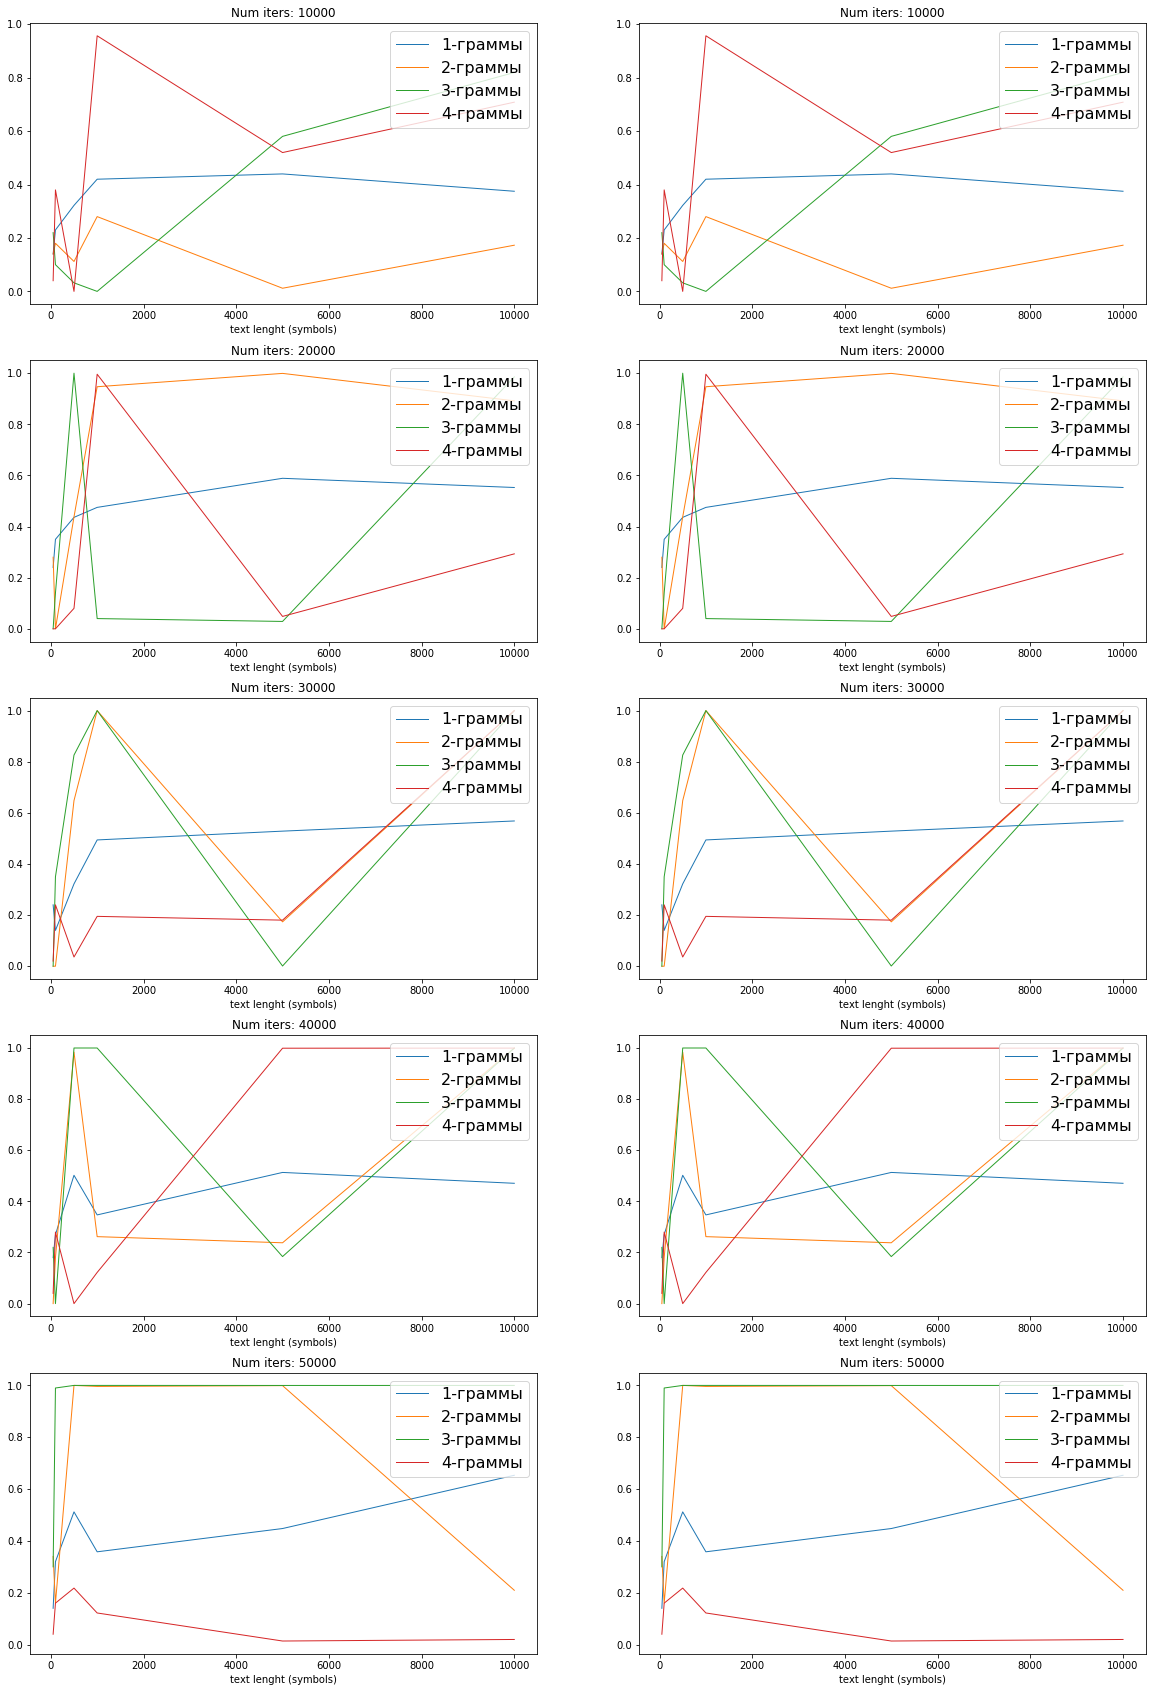

In [809]:
create_plots(n_iters_list, n_grams_list, text_lenghts, average_scores, max_scores)

#### Выводы 
- при большом количестве итераций 2, 3, 4-граммы выучиваются примерно одинаково, независимо от длины текста
- при небольшом количестве итераций 3, 4-граммы выучиваются лучше, чем биграммы, независимо от длины текста
- в целом, не очень понятно преимущество 3, 4-грамм перед биграммами. Но по результатам экспериментов кажется, что они могут полностью расшифровать текст, в отличие от биграмм
- лучше увеличить количество запусков, чем количество итераций

# Задание 6

Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

Данная модель может подойти для ситуаций, когда мы не знаем шифр, но можем адекватно измерить качество расшифровки, даже не зная, что конкретно зашифровано. Мне кажется, этот алгоритм мог бы подойти для распознавания речи. Если мы берем звуковую волну, и улавливаем там какие-то фонемы (предполагая, что один и тот же человек одни и те же фонемы произносит плюс-минус одинково), мы можем не заниматься напрямую расшифровкой этих фонем, а попробовать сопоставить их последовательность с некоторй последовательностью звук/букв. Если нам повезет, мы сможем превратить этот поток в связный текст, и понять, что человек говорил.

Аналогично, можно было бы попытаться сделать инструмент для людей с серьезными проблемами со здоровьем (например, ДЦП). Если человек не может писать буквы, но может ставить какие-то символы, он может придумать условно свой алфавит, который будет расшифрован этим алгоритмом. Это немного надуманная ситуация, т.к. человек может и сам показать нам расшифровку, но возможно, в каких-то случаях это будет полезно.

Также этот алгоритм можно было бы применить для расшифровки кодировок. Например, если есть какие-то старые редкоиспользуемые кодировки, или тексты, закодированные с ошибками, их можно было бы расшифровать с помощью этого алгоритма.